# Get datasets

In [1]:
# import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
# Find correct folder to use - /Users/shim/Desktop/AI/CovidbyGovt
%pwd

'/Users/shim2020/Desktop/Current/Classes/00_AI/githubs/CovidbyGovt/analysis3'

## Import Covid-19 global data

In [3]:
# direct link to John Hopkins global timeset data 
data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

covid = pd.read_csv(data, sep=",")

# preview our data
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,451,471,478,491,504,546,548,569,581,598
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,36,36,36,37,38,39,42,43,44,44
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,760,767,777,788,799,811,825,837,845,852
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,52,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,7,8,8,9,9,10


## Quick analysis of data

In [4]:
today = datetime.now()

# if time is after 5pm (Tucson time), then use today's date 
today5pm = today.replace(hour=17, minute=1, second=0, microsecond=0)
if today > today5pm:
    date = today  

# otherwise use yesterday's date
else:
    date = today - timedelta(1)

# date in string format
date = date.strftime('%D').lstrip("0").replace(" 0", " ")
date = date.replace("/0", "/")
date

'6/22/20'

In [5]:
# get WW death total
covid[[date]].sum()

6/22/20    472171
dtype: int64

In [6]:
# get US death counts
covid[date][covid["Country/Region"]=='US'].sum()

120402

## Visualize data

In [7]:
# get country totals 
country_totals = covid.groupby(['Country/Region']).sum().reset_index()
country_totals.rename(columns = {date:"deaths", "Country/Region": "country"}, inplace = True)
country_totals[['country', 'deaths']].sort_values(by="deaths", ascending=False).head(20)

,country,deaths
174,US,120402
23,Brazil,51271
178,United Kingdom,42731
85,Italy,34657
62,France,29666
158,Spain,28324
113,Mexico,22584
79,India,14011
81,Iran,9742
16,Belgium,9696


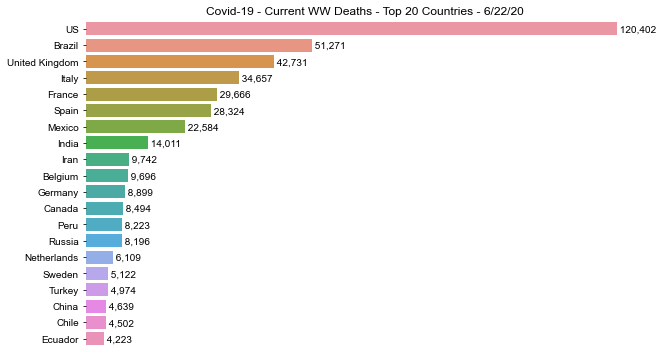

In [8]:
# add value labels on chart
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - float(space/2)
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# select subplot SIZE
fig, ax = plt.subplots(figsize=(10, 6))  

# REPLACE data
data = country_totals.sort_values(by='deaths', ascending=False).head(20)
g = sns.barplot(ax=ax, x='deaths', y='country', data=data)

# set DATE
current_date = str(date)

# put VALUES on selected data
show_values_on_bars(g, "h")  

# remove SPINES
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove LABELS.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom TICKS
g.set(xticks=[])

# set TITLE
g.set_title("Covid-19 - Current WW Deaths - Top 20 Countries - {}".format(current_date))

# SAVE graph to a file
g.figure.savefig("top20_countries.png")

## Investigate ICU Dataset

In [9]:
icu = pd.read_excel('../data/Other/ICU/KHN_ICU_bed_county_analysis_2.xlsx')
icu.head()

,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct,60plus_per_each_icu_bed
0,1001,Autauga,AL,Alabama,1,1,6,55036,10523,0.191,1754.0
1,1003,Baldwin,AL,Alabama,3,3,51,203360,53519,0.263,1049.0
2,1005,Barbour,AL,Alabama,1,1,5,26201,6150,0.235,1230.0
3,1007,Bibb,AL,Alabama,1,1,0,22580,4773,0.211,NaN
4,1009,Blount,AL,Alabama,1,1,6,57667,13600,0.236,2267.0


In [10]:
# check data
icu.isna().sum()

cnty_fips                       0
cnty_name                       0
st                              0
state                           0
hospitals_in_cost_reports       0
Hospitals_in_HC                 0
all_icu                         0
Total_pop                       0
60plus                          0
60plus_pct                      0
60plus_per_each_icu_bed      1665
dtype: int64

In [11]:
# remove column
icu.drop(['60plus_per_each_icu_bed'], axis=1, inplace=True)

In [12]:
# AZ ICU beds by Population
AZ_icu = icu[icu['st'] == 'AZ'].sort_values(by="Total_pop", ascending=False).head(15)
AZ_icu

,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
103,4013,Maricopa,AZ,Arizona,31,34,1004,4155501,808534,0.195
106,4019,Pima,AZ,Arizona,9,9,296,1007257,245814,0.244
107,4021,Pinal,AZ,Arizona,4,4,22,405537,100086,0.247
109,4025,Yavapai,AZ,Arizona,2,2,39,220972,85127,0.385
104,4015,Mohave,AZ,Arizona,4,4,80,204691,73559,0.359
110,4027,Yuma,AZ,Arizona,1,1,42,204281,45739,0.224
98,4005,Coconino,AZ,Arizona,3,3,41,138639,23195,0.167
97,4003,Cochise,AZ,Arizona,4,4,12,126516,35231,0.278
105,4017,Navajo,AZ,Arizona,4,4,12,107902,24267,0.225
96,4001,Apache,AZ,Arizona,4,4,0,71602,14107,0.197


# US by State covid data - merged with ICU data

In [13]:
# direct link to John Hopkins US timeset data 
data2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

covid_US = pd.read_csv(data2, sep=",")

# preview our data
covid_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,146,147,147,147,147,147,147,147,149,149
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,6,6,6,6,6,6,6,6,6,6


In [14]:
covid_US.shape

(3261, 165)

In [15]:
# check US death counts
covid_US[date].sum()

120402

Missing a data point with the global data - because of changing data, I'm not going to worry about this now.

In [16]:
# merge icu with Covid_US deaths - outer join to collect all deaths (some deaths may not be isolated to county level)
left = covid_US
right = icu
county_deaths = pd.merge(left, right, 
              how='outer', on=None, 
              left_on="FIPS", right_on="cnty_fips")
county_deaths

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3257,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3258,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3259,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# remove columns that are doubled by merge
county_deaths.drop(columns=['cnty_fips','cnty_name','state'])

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/20/20,6/21/20,6/22/20,st,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,147,149,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,6,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3257,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3258,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3259,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,19,19,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualize - US State Data

In [18]:
# group the state deaths
states = county_deaths[['Province_State', date]].copy()
states = states.groupby(['Province_State'], sort=False).sum().reset_index()

# show descending
states = states.sort_values(by=date, ascending=False)
states.head(10)

,Province_State,6/22/20
37,New York,31176
35,New Jersey,12974
26,Massachusetts,7873
18,Illinois,6671
43,Pennsylvania,6426
27,Michigan,6097
9,California,5566
11,Connecticut,4263
14,Florida,3173
23,Louisiana,3117


In [19]:
# check total deaths
states[date].sum()

120402

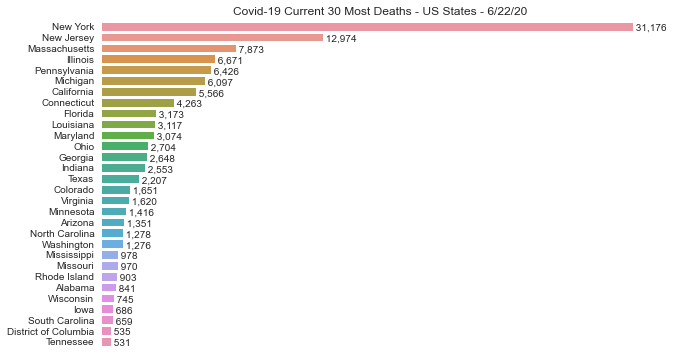

In [20]:
# function for setting horizontal labels
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# REPLACE dataset
data = states.head(30)
current_date = str(date)

# plot VALUES on selected data
g = sns.barplot(ax=ax, x=date, y='Province_State', data=data)
show_values_on_bars(g, "h")  

# remove spines
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove labels.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom values
g.set(xticks=[])

# set TITLE
g.set_title("Covid-19 Current 30 Most Deaths - US States - {}".format(current_date))

# save graph to a FILENAME
g.figure.savefig("US_states30.png")

## Visualize - AZ County Deaths

In [21]:
# tally of county deaths
co = county_deaths[['Admin2', 'Province_State', date]].copy()
co.rename(columns = {'Admin2':'county','Province_State':'state',date:'total_deaths'}, inplace = True)
co = co.sort_values(by='total_deaths', ascending=False)
co.head(10)

,county,state,total_deaths
1863,New York,New York,22321
615,Cook,Illinois,4423
209,Los Angeles,California,3137
1317,Wayne,Michigan,2689
1862,Nassau,New York,2178
1884,Suffolk,New York,1965
1230,Middlesex,Massachusetts,1809
1785,Essex,New Jersey,1761
1780,Bergen,New Jersey,1701
2299,Philadelphia,Pennsylvania,1553


In [22]:
# check total deaths
co["total_deaths"].sum()

120402

In [23]:
# check AZ totals by county
AZ_county = co[co['state']=='Arizona']
AZ_county

,county,state,total_deaths
108,Maricopa,Arizona,634
111,Pima,Arizona,242
110,Navajo,Arizona,95
103,Coconino,Arizona,90
109,Mohave,Arizona,73
101,Apache,Arizona,66
115,Yuma,Arizona,65
112,Pinal,Arizona,50
113,Santa Cruz,Arizona,13
114,Yavapai,Arizona,7


Hmmm...Unassigned and Out of AZ need to reassigned ... eventually...for now I'll keep them in the totals

In [24]:
# deaths in AZ - check with chart of states
AZ_county['total_deaths'].sum()

1351

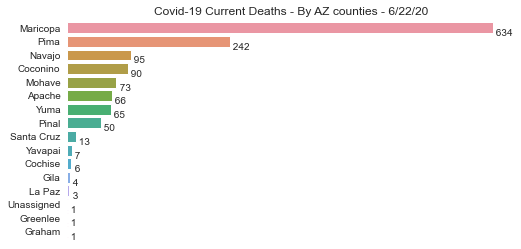

In [25]:
# add values on chart
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()+ float(space/2)
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# select subplot size
fig, ax = plt.subplots(figsize=(8, 4))  

# put values on selected data
data = AZ_county[AZ_county['total_deaths'] >= 1]
g = sns.barplot(ax=ax, x='total_deaths', y='county', data=data)
show_values_on_bars(g, "h")  

# remove spines
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove labels.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom values
g.set(xticks=[])

# set title
g.set_title("Covid-19 Current Deaths - By AZ counties - {}".format(str(date)))

# save graph to a file
g.figure.savefig("AZ_counties_list.png")

# Timeseries - Worldwide

In [26]:
# look at past month worldwide
covid_ww = covid.iloc[:, 4:].sum(axis=0)
df = covid_ww.tail(30)
df.tail()

6/18/20    453979
6/19/20    460069
6/20/20    464521
6/21/20    468397
6/22/20    472171
dtype: int64

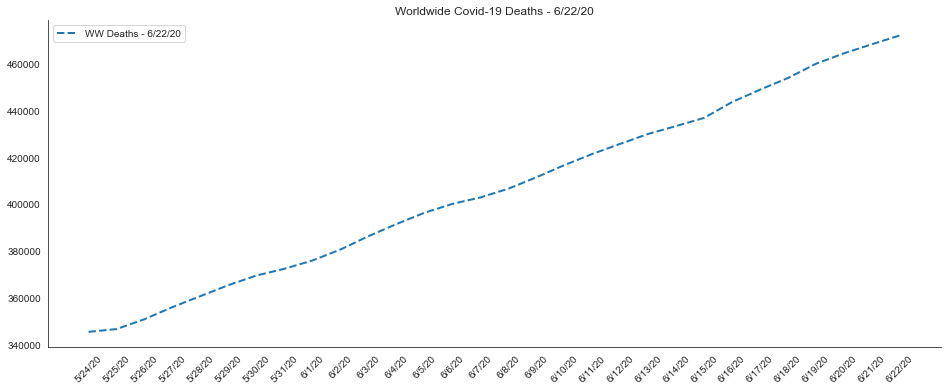

In [27]:
# simple graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2)
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['WW Deaths - {}'.format(str(date))]) 
plt.title("Worldwide Covid-19 Deaths - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("WW_deaths.png")

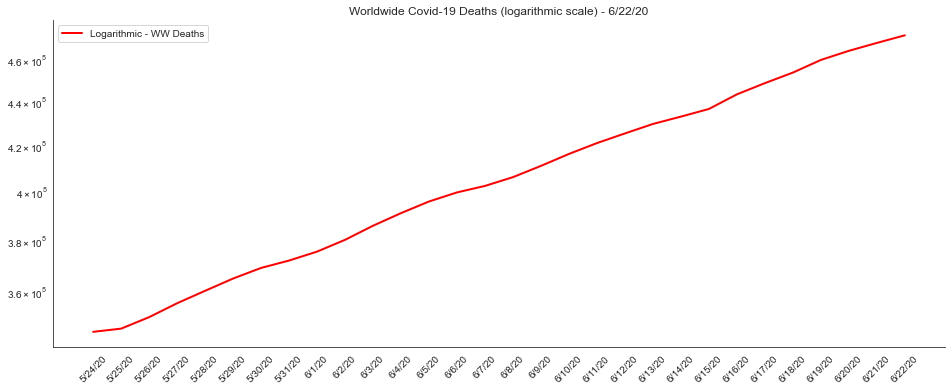

In [28]:
# look at logarithmic growth
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2, color='red')
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("-")
plt.xticks(rotation=45)
ax.legend(['Logarithmic - WW Deaths']) 
plt.title("Worldwide Covid-19 Deaths (logarithmic scale) - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("WW_deaths_log.png")

## WW - > Multiple Country Timeseries

In [29]:
# melt dataset - Keep certain columns and change others to vertical axis(?)
covid_ww_long = pd.melt(covid, id_vars=covid.iloc[:, :4],
var_name='Date', value_name='Deaths')
covid_ww_long

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
40693,NaN,Sao Tome and Principe,0.186360,6.613081,6/22/20,12
40694,NaN,Yemen,15.552727,48.516388,6/22/20,257
40695,NaN,Comoros,-11.645500,43.333300,6/22/20,5
40696,NaN,Tajikistan,38.861034,71.276093,6/22/20,52


In [30]:
# group countries by date - sort is False here because the date is not the sort
countries = covid_ww_long.groupby(['Date', 'Country/Region'], sort=False).sum().reset_index()

# drop columns that don't make sense
countries.drop(['Lat','Long'], axis=1, inplace=True)

# look at timeseries 
countries

,Date,Country/Region,Deaths
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0
...,...,...,...
28759,6/22/20,Sao Tome and Principe,12
28760,6/22/20,Yemen,257
28761,6/22/20,Comoros,5
28762,6/22/20,Tajikistan,52


In [31]:
# check that it matches above summary
top = countries[countries['Date']==date].sort_values(by='Deaths', ascending = False).head(10)
top

,Date,Country/Region,Deaths
28732,6/22/20,US,120402
28597,6/22/20,Brazil,51271
28730,6/22/20,United Kingdom,42731
28653,6/22/20,Italy,34657
28632,6/22/20,France,29666
28714,6/22/20,Spain,28324
28674,6/22/20,Mexico,22584
28647,6/22/20,India,14011
28649,6/22/20,Iran,9742
28592,6/22/20,Belgium,9696


In [32]:
# total deaths in top
top['Deaths'].sum()

363084

### Worldwide Timeseries - Graphs

In [33]:
# add a column for LEGEND to top
top['legend']= top['Country/Region'] + ' - ' + top['Deaths'].astype(str)

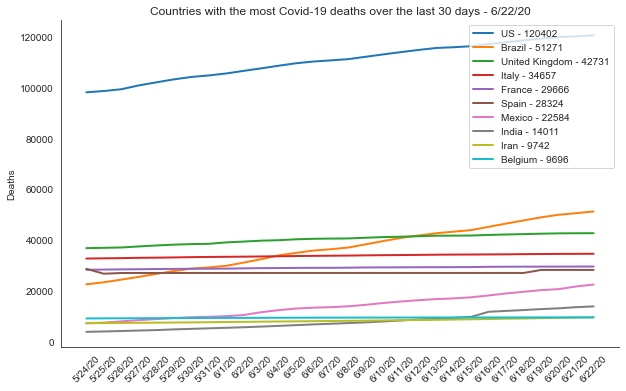

In [34]:
# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# set ATTRIBUTEs for each dataset
for i in top['Country/Region']:
    # set data to last 30 days
    df = countries[countries['Country/Region' ] == i].tail(30)
    # set graph
    g = sns.lineplot(ax=ax, x='Date', y='Deaths', data=df, sort=False, linewidth=2)  

# set date 
current_date = str(date) 

# remove spines
sns.despine(right=True, top=True)
sns.set_style('white')

# set TITLE
g.set_title("Countries with the most Covid-19 deaths over the last 30 days - {}".format(current_date))

# set extras
g.set_xlabel("")
plt.legend(top['legend'])
plt.xticks(rotation=45)
plt.show()

# save graph to a FILENAME
fig.savefig("Top10_countries.png")

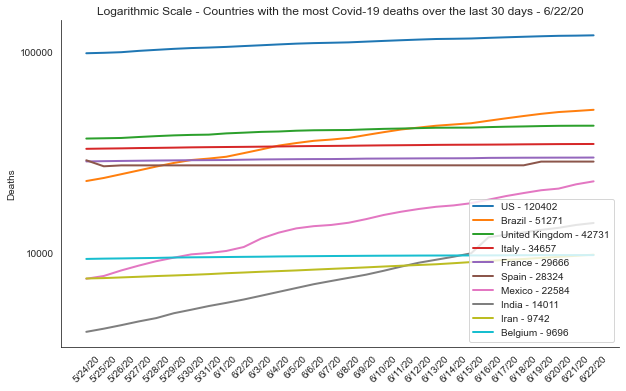

In [35]:
# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# set log scale
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )

# set ATTRIBUTEs for each dataset
for i in top['Country/Region']:
    # set data to last 30 days
    df = countries[countries['Country/Region' ] == i].tail(30)
    # set graph
    g = sns.lineplot(ax=ax, x='Date', y='Deaths', data=df, sort=False, linewidth=2)  

# set line style
ax.lines[0].set_linestyle("-")

# set date 
current_date = str(date) 

# remove spines
sns.despine(right=True, top=True)
sns.set_style('white')

# set TITLE
g.set_title("Logarithmic Scale - Countries with the most Covid-19 deaths over the last 30 days - {}".format(current_date))

# set extras
g.set_xlabel("")
plt.legend(top['legend'])
plt.xticks(rotation=45)
plt.show()

# save graph to a FILENAME
fig.savefig("Top10_countries_log.png")

## Arizona timeseries

In [36]:
# AZ Deaths by Date, ICU and Population 
AZ = county_deaths[county_deaths['Province_State']=='Arizona']

In [37]:
# investigate AZ dataset
AZ.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
101,84004001,US,USA,840,4001.0,Apache,Arizona,US,35.394650,-109.489238,...,4001.0,Apache,AZ,Arizona,4.0,4.0,0.0,71602.0,14107.0,0.197
102,84004003,US,USA,840,4003.0,Cochise,Arizona,US,31.879347,-109.751609,...,4003.0,Cochise,AZ,Arizona,4.0,4.0,12.0,126516.0,35231.0,0.278
103,84004005,US,USA,840,4005.0,Coconino,Arizona,US,35.838834,-111.770718,...,4005.0,Coconino,AZ,Arizona,3.0,3.0,41.0,138639.0,23195.0,0.167
104,84004007,US,USA,840,4007.0,Gila,Arizona,US,33.801901,-110.813278,...,4007.0,Gila,AZ,Arizona,3.0,3.0,8.0,53145.0,18752.0,0.353
105,84004009,US,USA,840,4009.0,Graham,Arizona,US,32.931669,-109.888218,...,4009.0,Graham,AZ,Arizona,1.0,1.0,0.0,37700.0,6933.0,0.184


In [38]:
# drop extra columns (not dates)
drops = ['UID','iso2','iso3','code3','Province_State','Country_Region','cnty_fips','cnty_name','st','state','hospitals_in_cost_reports','Hospitals_in_HC','all_icu','Total_pop','60plus','60plus_pct']
AZ_dates = AZ.drop(drops, axis=1,inplace=False)
AZ_dates.tail()

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
113,4023.0,Santa Cruz,31.525090,-110.847909,"Santa Cruz, Arizona, US",46498,0,0,0,0,...,12,12,12,13,13,13,14,13,13,13
114,4025.0,Yavapai,34.599339,-112.553859,"Yavapai, Arizona, US",235099,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
115,4027.0,Yuma,32.768957,-113.906667,"Yuma, Arizona, US",213787,0,0,0,0,...,47,47,51,53,53,55,61,63,65,65
3159,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3211,90004.0,Unassigned,0.000000,0.000000,"Unassigned, Arizona, US",0,0,0,0,0,...,2,2,2,1,1,1,1,1,1,1


## Calculating METRICS

In [39]:
# Yesterday's date

# Today's date
today = datetime.now()

# if time is after 5pm (Tucson time), then use today's date 
today5pm = today.replace(hour=17, minute=1, second=0, microsecond=0)
if today > today5pm:
    date_ext = today  

# otherwise use yesterday's date for data
else:
    date_ext = today - timedelta(1)
    
# define yesterday (external) is in datetime format
yesterday_ext = date_ext - timedelta(1)

# yesterday in string format
yesterday = yesterday_ext.strftime('%D').lstrip("0").replace(" 0", " ")
yesterday = yesterday.replace("/0", "/")
yesterday

'6/21/20'

In [40]:
# Add Changes , Pct_change, and Pct_pop columns
AZ_dates['Change'] = AZ_dates[date] - AZ_dates[yesterday]
AZ_dates['Pct_change'] = AZ_dates['Change']/AZ_dates[yesterday]*100
AZ_dates['Deaths_per_mil']= AZ_dates[date]/AZ_dates['Population']*1000000

### Metrics for Total AZ Deaths by County

In [41]:
# Show list of counties and current deaths by Population size
AZ_dates = AZ_dates.sort_values(by='Population', ascending=False)

# Add all metrics - rounded
AZ_dates[['Combined_Key', 'Population', date,'Change', 'Pct_change','Deaths_per_mil']].round()

,Combined_Key,Population,6/22/20,Change,Pct_change,Deaths_per_mil
108,"Maricopa, Arizona, US",4485414,634,2,0.0,141.0
111,"Pima, Arizona, US",1047279,242,0,0.0,231.0
112,"Pinal, Arizona, US",462789,50,0,0.0,108.0
114,"Yavapai, Arizona, US",235099,7,0,0.0,30.0
115,"Yuma, Arizona, US",213787,65,0,0.0,304.0
109,"Mohave, Arizona, US",212181,73,0,0.0,344.0
103,"Coconino, Arizona, US",143476,90,0,0.0,627.0
102,"Cochise, Arizona, US",125922,6,0,0.0,48.0
110,"Navajo, Arizona, US",110924,95,0,0.0,856.0
101,"Apache, Arizona, US",71887,66,0,0.0,918.0


### AZ timeseries by county

In [42]:
# drop extra columns
AZ_dates.drop(['Change', 'Pct_change','Deaths_per_mil'], axis=1, inplace=True)
AZ_dates.tail()

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
105,4009.0,Graham,32.931669,-109.888218,"Graham, Arizona, US",38837,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
107,4012.0,La Paz,33.728542,-113.981003,"La Paz, Arizona, US",21108,0,0,0,0,...,1,1,1,3,3,3,3,3,3,3
106,4011.0,Greenlee,33.214988,-109.240528,"Greenlee, Arizona, US",9498,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3159,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3211,90004.0,Unassigned,0.000000,0.000000,"Unassigned, Arizona, US",0,0,0,0,0,...,2,2,2,1,1,1,1,1,1,1


In [43]:
# melt dataset - Keep certain columns and change others to vertical axis(?)
AZ_counties = pd.melt(AZ_dates, id_vars=AZ_dates.iloc[:, :6],
var_name='Date', value_name='Deaths')
AZ_counties

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths
0,4013.0,Maricopa,33.348359,-112.491815,"Maricopa, Arizona, US",4485414,1/22/20,0
1,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,1/22/20,0
2,4021.0,Pinal,32.905256,-111.344948,"Pinal, Arizona, US",462789,1/22/20,0
3,4025.0,Yavapai,34.599339,-112.553859,"Yavapai, Arizona, US",235099,1/22/20,0
4,4027.0,Yuma,32.768957,-113.906667,"Yuma, Arizona, US",213787,1/22/20,0
...,...,...,...,...,...,...,...,...
2596,4009.0,Graham,32.931669,-109.888218,"Graham, Arizona, US",38837,6/22/20,1
2597,4012.0,La Paz,33.728542,-113.981003,"La Paz, Arizona, US",21108,6/22/20,3
2598,4011.0,Greenlee,33.214988,-109.240528,"Greenlee, Arizona, US",9498,6/22/20,1
2599,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,6/22/20,0


In [44]:
# add a column for LEGEND to top
AZ_counties['legend']= AZ_counties['Admin2'] + ' - ' + AZ_counties['Deaths'].astype(str)
AZ_counties

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths,legend
0,4013.0,Maricopa,33.348359,-112.491815,"Maricopa, Arizona, US",4485414,1/22/20,0,Maricopa - 0
1,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,1/22/20,0,Pima - 0
2,4021.0,Pinal,32.905256,-111.344948,"Pinal, Arizona, US",462789,1/22/20,0,Pinal - 0
3,4025.0,Yavapai,34.599339,-112.553859,"Yavapai, Arizona, US",235099,1/22/20,0,Yavapai - 0
4,4027.0,Yuma,32.768957,-113.906667,"Yuma, Arizona, US",213787,1/22/20,0,Yuma - 0
...,...,...,...,...,...,...,...,...,...
2596,4009.0,Graham,32.931669,-109.888218,"Graham, Arizona, US",38837,6/22/20,1,Graham - 1
2597,4012.0,La Paz,33.728542,-113.981003,"La Paz, Arizona, US",21108,6/22/20,3,La Paz - 3
2598,4011.0,Greenlee,33.214988,-109.240528,"Greenlee, Arizona, US",9498,6/22/20,1,Greenlee - 1
2599,80004.0,Out of AZ,0.000000,0.000000,"Out of AZ, Arizona, US",0,6/22/20,0,Out of AZ - 0


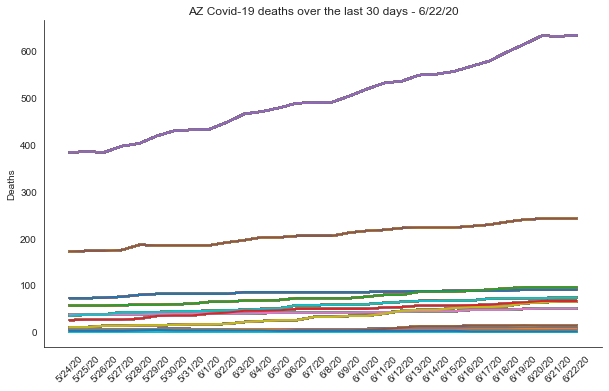

In [45]:
# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# # set log scale
# ax.set(yscale="log")
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )

# set ATTRIBUTEs for each dataset
for i in AZ_counties['Admin2']:
    # set data to last 30 days
    df = AZ_counties[AZ_counties['Admin2'] == i].tail(30)
    # set graph
    g = sns.lineplot(ax=ax, x='Date', y='Deaths', data=df, sort=False, linewidth=2)  

# set line style
ax.lines[0].set_linestyle("-")

# set date 
current_date = str(date) 

# remove spines
sns.despine(right=True, top=True)
sns.set_style('white')

# set TITLE
g.set_title("AZ Covid-19 deaths over the last 30 days - {}".format(current_date))

# set extras
g.set_xlabel("")
plt.xticks(rotation=45)
plt.show()

# save graph to a FILENAME
fig.savefig("AZ_counties.png")

### STUCK ON GETTING THE LEGEND RIGHT!
#### They relabeled some entries  on 4/18/20. Pima has just started reporting more regularly than once or twice a week!

## Calculating Pima PCT_CHANGE

In [46]:
Pima_dates=AZ_dates[AZ_dates['Admin2']=='Pima'].copy()
Pima_dates

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20
111,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,0,0,0,0,...,223,223,223,226,229,235,240,242,242,242


In [47]:
# unpivot DataFrame from wide to long format, optionally leaving identifiers set.
Pima_long = pd.melt(Pima_dates, id_vars=Pima_dates.iloc[:,:6],
var_name='Date', value_name='Deaths')
Pima_long.tail()


,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths
148,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/18/20,235
149,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/19/20,240
150,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/20/20,242
151,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/21/20,242
152,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/22/20,242


In [48]:
Pima30 = Pima_long.copy().tail(30)
Pima30[['PC']]=Pima30[['Deaths']].pct_change()
Pima30.tail()

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths,PC
148,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/18/20,235,0.026201
149,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/19/20,240,0.021277
150,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/20/20,242,0.008333
151,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/21/20,242,0.000000
152,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/22/20,242,0.000000


In [49]:
# set dataset for graphs
df = Pima30
df=df[df['Deaths']>0]
df.tail(10)

,FIPS,Admin2,Lat,Long_,Combined_Key,Population,Date,Deaths,PC
143,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/13/20,223,0.004505
144,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/14/20,223,0.000000
145,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/15/20,223,0.000000
146,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/16/20,226,0.013453
147,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/17/20,229,0.013274
148,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/18/20,235,0.026201
149,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/19/20,240,0.021277
150,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/20/20,242,0.008333
151,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/21/20,242,0.000000
152,4019.0,Pima,32.097133,-111.789003,"Pima, Arizona, US",1047279,6/22/20,242,0.000000


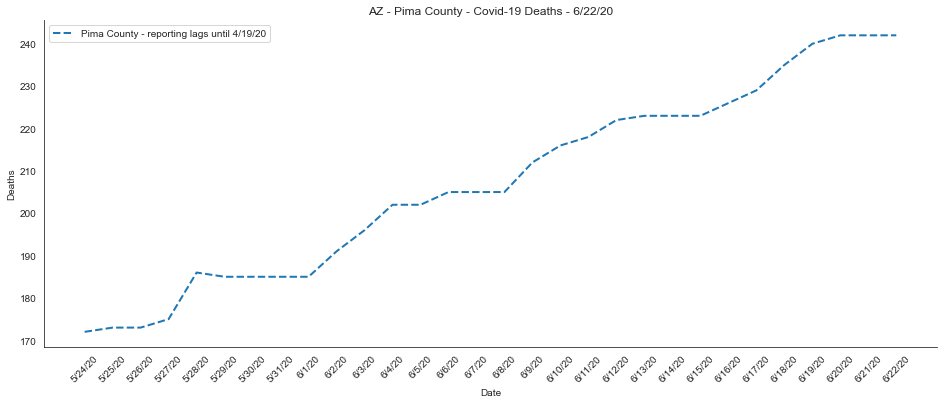

In [50]:
# simple timeseries graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x='Date', y='Deaths', data=df, sort=False, linewidth=2)
sns.despine(right=True, top=True)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['Pima County - reporting lags until 4/19/20']) 
plt.title("AZ - Pima County - Covid-19 Deaths - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("Pima_deaths.png")

###### What do I do when reporting is like this? Does ML take this into account? 

Should I redo the dataset to weekly? Trailing 7 day? Trailing 3 day?

## TO DO:
1. Change data to look at increment per day per country - KEY!!!!!!!!!
2. Look at rate of increase
3. Look at time-series - # of days vs # of deaths, # of days vs. # of cases
4. Separate out test cases vs training case
    - US separately is the Test case
    - outlier - South Korea, Singapore, China
    - ROW is the training case
5. Look at 2 plots
    - in deaths 
    - in deaths as a % of pop
    